In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("sol-usd-max.csv")
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['snapped_at'] = df['snapped_at'].dt.strftime('%Y-%m-%d')
df.head()

,snapped_at,price,market_cap,total_volume
0,2020-04-11,0.957606,7.827652e+06,9.267267e+07
1,2020-04-12,0.784711,6.173608e+06,4.945869e+07
2,2020-04-13,0.875994,7.269680e+06,3.782101e+07
3,2020-04-14,0.786712,6.302364e+06,1.957921e+07
4,2020-04-15,0.666673,5.306221e+06,1.752353e+07


In [3]:
df.tail()

,snapped_at,price,market_cap,total_volume
1533,2024-06-22,134.513295,6.207826e+10,2.427906e+09
1534,2024-06-23,133.486085,6.160669e+10,1.097685e+09
1535,2024-06-24,128.540282,5.935284e+10,1.252604e+09
1536,2024-06-25,132.337787,6.104235e+10,3.858604e+09
1537,2024-06-26,136.513745,6.310626e+10,2.814100e+09


In [4]:
df.describe()

,price,market_cap,total_volume
count,1538.000000,1.538000e+03,1.538000e+03
mean,56.041458,2.016047e+10,1.320400e+09
std,59.967432,2.238520e+10,1.663267e+09
min,0.513923,4.171226e+06,5.489101e+05
25%,14.169609,4.925559e+09,2.294146e+08
50%,30.849660,1.001419e+10,7.460347e+08
75%,93.991850,3.182447e+10,1.882708e+09
max,259.239558,9.010785e+10,1.614909e+10


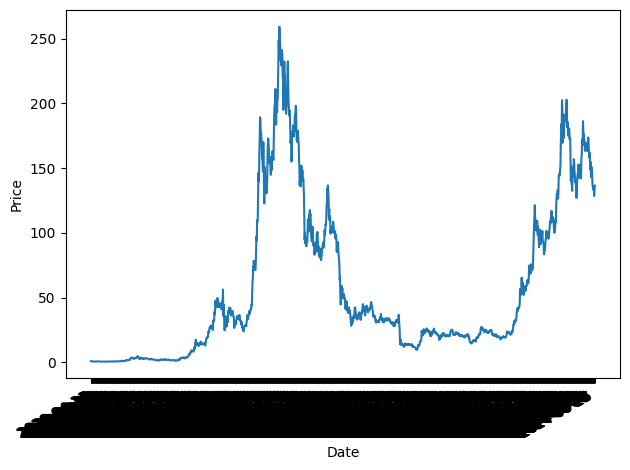

In [6]:
fig, ax = plt.subplots()

ax.plot(df["snapped_at"], df["price"])
ax.set_xlabel("Date")
ax.set_ylabel("Price")
# ax.axvspan(2056, 2421, color='#808080', alpha=0.2)

# plt.xticks(np.arange(53, 2421,365))

fig.autofmt_xdate()
plt.tight_layout()

Is this Random Walk?


In [7]:
ADF_result = adfuller(df['price'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.6134723869990792
p-value: 0.47615309069549133


p-value is not less than 0.05 so cannot reject null hypothesis.


so we get difference

In [8]:
diff_price = np.diff(df['price'], n=1)

In [9]:
diff_ADF_result = adfuller(diff_price)

print(f'ADF Statistic: {diff_ADF_result[0]}')
print(f'p-value: {diff_ADF_result[1]}')

ADF Statistic: -6.148409056243905
p-value: 7.666855180105214e-08


p-value is less than 0.05 so diff_price is stationary.

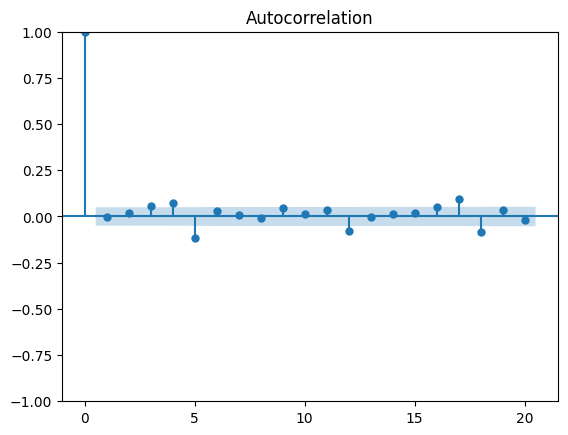

In [10]:
plot_acf(diff_price, lags=20);

Time series is very near to Random Walk. But not 100%